#FINRL Train Stock Trading
https://github.com/AI4Finance-LLC/FinRL/blob/master/finrl/train.py

In this work SAC used as RL agorithm rather than D Q-Network. The reason of this choice explained in "Train Model" section.

Multi-stock trading data used in train and trade data part. So this work related to multi-stock trading with RL. DOW The latest market data for all 30 stocks in the Dow Jones Industrial Average. So in this work there is "BIST_30_TICKER" relates with that.



#SETUP

In [1]:
 # Install the unstable development version in Jupyter notebook:
!pip install git+https://github.com/AI4Finance-LLC/FinRL-Library.git

  Cloning https://github.com/AI4Finance-LLC/FinRL-Library.git to /tmp/pip-req-build-vd579jjt
  Running command git clone -q https://github.com/AI4Finance-LLC/FinRL-Library.git /tmp/pip-req-build-vd579jjt
  Cloning https://github.com/quantopian/pyfolio.git to /tmp/pip-install-puxrpsu2/pyfolio_b63170f84e1b4d03853760d8cc2e51f0
  Running command git clone -q https://github.com/quantopian/pyfolio.git /tmp/pip-install-puxrpsu2/pyfolio_b63170f84e1b4d03853760d8cc2e51f0
     |████████████████████████████████| 172 kB 8.3 MB/s 
     |████████████████████████████████| 52 kB 1.5 MB/s 
     |████████████████████████████████| 6.3 MB 39.5 MB/s 
  Created wheel for finrl: filename=finrl-0.3.0-py3-none-any.whl size=66435 sha256=6af2365effffc6a05304e382258139e2e1107cd175a32df4370fac3ef4f3aa83
  Stored in directory: /tmp/pip-ephem-wheel-cache-ltfqfzf6/wheels/17/ff/bd/1bc602a0352762b0b24041b88536d803ae343ed0a711fcf55e
  Created wheel for pyfolio: filename=pyfolio-0.9.2+75.g4b901f6-py3-none-any.whl size=757

In [2]:
#for data download part -- yahoo finance
!pip install yfinance

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing

matplotlib.use("Agg")
import datetime

from finrl.apps import config
from finrl.neo_finrl.preprocessor.yahoodownloader import YahooDownloader
from finrl.neo_finrl.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.neo_finrl.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.drl_agents.stablebaselines3.models import DRLAgent
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline

import itertools


/usr/local/lib/python3.7/dist-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


In [4]:
import pandas as pd
import yfinance as yf

#Collect Data

#Visualize

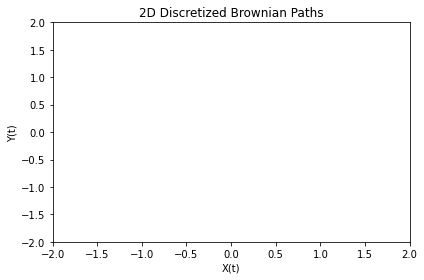

In [5]:
stockList = ["AKBNK.IS","ARCLK.IS","ASELS.IS","BIMAS.IS","DOHOL.IS","EKGYO.IS","EREGL.IS","FROTO.IS","GARAN.IS","GUBRF.IS","HALKB.IS","ISCTR.IS","KCHOL.IS","KOZAA.IS","KOZAL.IS",
"KRDMD.IS","PETKM.IS","PGSUS.IS","SAHOL.IS","SASA.IS","SISE.IS","TAVHL.IS","TCELL.IS","THYAO.IS","TKFEN.IS","TTKOM.IS","TUPRS.IS","VAKBN.IS","VESTL.IS","YKBNK.IS"]
len(stockList)

30

In [6]:
print("==============Start Fetching Data===========")
df_visualize = YahooDownloader(
    start_date=config.START_DATE,
    end_date=config.END_DATE,
    ticker_list=stockList,
).fetch_data()

==============Start Fetching Data===========
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1

In [7]:
df_visualize

df_x = df_visualize.copy()
df_x=df_x.sort_values(['date','tic'],ignore_index=True)
df_x.index = df_x.date.factorize()[0]
merged_closes = df_x.pivot_table(index = 'date',columns = 'tic', values = 'close')

merged_closes = merged_closes.ffill().bfill()
print(df_visualize.iloc[0])
print(merged_closes)


date       2009-01-02
open           3.1254
high          3.17684
low           3.09967
close          2.4599
volume    4.09007e+06
tic          AKBNK.IS
day                 4
Name: 0, dtype: object
tic         AKBNK.IS   ARCLK.IS   ASELS.IS  ...  VAKBN.IS   VESTL.IS  YKBNK.IS
date                                        ...                               
2009-01-02  2.459899   1.249496   0.165186  ...  1.112367   0.797426  1.254104
2009-01-05  2.480145   1.243249   0.163147  ...  1.139720   0.788154  1.254104
2009-01-06  2.581375   1.274486   0.164166  ...  1.194427   0.797426  1.277766
2009-01-07  2.505453   1.280734   0.166205  ...  1.221780   0.806699  1.277766
2009-01-08  2.378914   1.199516   0.160087  ...  1.139720   0.723247  1.183117
...              ...        ...        ...  ...       ...        ...       ...
2020-12-25  6.358143  28.140322  18.010000  ...  4.630000  19.416399  2.938745
2020-12-28  6.387398  28.720728  18.020000  ...  4.620000  19.750204  2.938745
2020-12-29 

In [8]:
df_visualize = merged_closes

In [9]:
print(len(df_visualize.columns))

30


In [10]:
first_n_column  = df_visualize.iloc[: , :4]

In [11]:
first_n_column

tic,AKBNK.IS,ARCLK.IS,ASELS.IS,BIMAS.IS
date,,,,
2009-01-02,2.459899,1.249496,0.165186,2.927352
2009-01-05,2.480145,1.243249,0.163147,2.860821
2009-01-06,2.581375,1.274486,0.164166,2.882998
2009-01-07,2.505453,1.280734,0.166205,2.860821
2009-01-08,2.378914,1.199516,0.160087,2.816467
...,...,...,...,...
2020-12-25,6.358143,28.140322,18.010000,69.032173
2020-12-28,6.387398,28.720728,18.020000,69.646004
2020-12-29,6.455660,28.627113,17.900000,71.487495


In [144]:

%matplotlib inline
from matplotlib import rc,animation
rc('animation', html='jshtml')

In [17]:
import numpy as np
import matplotlib.pyplot as plt
color = ['red', 'green', 'blue', 'orange']
fig = plt.figure()
plt.xticks(rotation=45, ha="right", rotation_mode="anchor") #rotate the x-axis values
plt.subplots_adjust(bottom = 0.2, top = 0.9) #ensuring the dates (on the x-axis) fit in the screen
plt.ylabel('Close Value')
plt.xlabel('Dates')

def buildmebarchart(i):
    plt.legend(df_visualize.columns)
    p = plt.plot(df_visualize[:i].index, df_visualize[:i].values) #note it only returns the dataset, up to the point i
    for i in range(0,4):
        p[i].set_color(color[i]) #set the colour of each curve

import matplotlib.animation as ani
anim = ani.FuncAnimation(fig, buildmebarchart, interval=100)


# Save as GIF
anim.save('animationMotion2d.gif', writer='pillow', fps=60)



In [18]:
from matplotlib import rc
rc('animation', html='jshtml')

In [19]:
from IPython.display import HTML, Image  
Image(url='animationMotion2d.gif')
HTML(anim.to_html5_video())

In [15]:
anim


In [110]:
animator

In [63]:
# print("==============Start Fetching Data===========")
# df_ = YahooDownloader(
#     start_date=config.START_DATE,
#     end_date=config.END_DATE,
#     ticker_list=config.DOW_30_TICKER,
# ).fetch_data()

==============Start Fetching Data===========
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1

In [66]:


df_x = df_.copy()
df_x=df_x.sort_values(['date','tic'],ignore_index=True)
df_x.index = df_x.date.factorize()[0]
merged_closes = df_x.pivot_table(index = 'date',columns = 'tic', values = 'close')

merged_closes = merged_closes.ffill().bfill()
print(merged_closes)



tic               AAPL         AXP  ...         WMT        XOM
date                                ...                       
2009-01-02    2.782837   15.657365  ...   42.443317  51.062714
2009-01-05    2.900283   16.159571  ...   41.953419  51.056461
2009-01-06    2.852447   17.066782  ...   41.582279  50.224583
2009-01-07    2.790810   16.347834  ...   41.225983  48.942417
2009-01-08    2.842633   16.372334  ...   38.138134  49.467777
...                ...         ...  ...         ...        ...
2020-12-24  131.352829  116.286095  ...  141.822449  39.716839
2020-12-28  136.050766  117.286942  ...  143.522339  39.850506
2020-12-29  134.239273  117.068932  ...  142.613113  39.401783
2020-12-30  133.094650  118.347237  ...  142.494492  39.716839
2020-12-31  132.069473  119.813828  ...  142.464828  39.354042

[3021 rows x 30 columns]


#End

In [20]:
tickers = ["VESTL.IS","VAKBN.IS","TUPRS.IS","THYAO.IS","HALKB.IS","SASA.IS","PETKM.IS","SAHOL.IS","PGSUS.IS","GARAN.IS","AKBNK.IS","ARCLK.IS","BIMAS.IS","EREGL.IS"] # 20 tane hisse


In [21]:
date1="2015-07-27"
date2="2021-07-28"
list_data = []
for ticker in tickers:
  data = yf.download(tickers=ticker , start=date1, end=date2, interval='1d' )
  data["tic"] = ticker
  data["date"] = data.index
  data = data.reset_index()
  list_data.append(data)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [22]:
list_data

[           Date       Open       High  ...   Volume       tic       date
 0    2015-07-27   4.450000   4.450000  ...  1074220  VESTL.IS 2015-07-27
 1    2015-07-28   4.450000   4.470000  ...  1609540  VESTL.IS 2015-07-28
 2    2015-07-29   4.430000   4.460000  ...   981396  VESTL.IS 2015-07-29
 3    2015-07-30   4.480000   4.490000  ...   871776  VESTL.IS 2015-07-30
 4    2015-07-31   4.480000   4.650000  ...  6003500  VESTL.IS 2015-07-31
 ...         ...        ...        ...  ...      ...       ...        ...
 1526 2021-07-14  30.420000  31.440001  ...  2070274  VESTL.IS 2021-07-14
 1527 2021-07-16  31.420000  31.620001  ...  1660750  VESTL.IS 2021-07-16
 1528 2021-07-19  31.400000  32.160000  ...  1369061  VESTL.IS 2021-07-19
 1529 2021-07-26  32.200001  32.279999  ...  2489134  VESTL.IS 2021-07-26
 1530 2021-07-27  31.980000  32.099998  ...  1726049  VESTL.IS 2021-07-27
 
 [1531 rows x 9 columns],
            Date  Open  High   Low  ...  Adj Close    Volume       tic       date
 0

In [23]:
import pandas as pd
df = pd.concat(list_data)

del df['Date']

In [24]:

df.isna().sum()
multi_ticker_df = df.ffill().bfill()
print(multi_ticker_df)

           Open       High        Low  ...    Volume       tic       date
0      4.450000   4.450000   4.330000  ...   1074220  VESTL.IS 2015-07-27
1      4.450000   4.470000   4.370000  ...   1609540  VESTL.IS 2015-07-28
2      4.430000   4.460000   4.410000  ...    981396  VESTL.IS 2015-07-29
3      4.480000   4.490000   4.430000  ...    871776  VESTL.IS 2015-07-30
4      4.480000   4.650000   4.480000  ...   6003500  VESTL.IS 2015-07-31
...         ...        ...        ...  ...       ...       ...        ...
1526  17.990000  18.400000  17.990000  ...  19197906  EREGL.IS 2021-07-14
1527  18.250000  18.250000  17.910000  ...  17163796  EREGL.IS 2021-07-16
1528  18.000000  18.030001  17.850000  ...   5709839  EREGL.IS 2021-07-19
1529  18.040001  18.250000  18.000000  ...  23665915  EREGL.IS 2021-07-26
1530  18.070000  18.490000  17.969999  ...  25081610  EREGL.IS 2021-07-27

[21434 rows x 8 columns]


In [ ]:
# print("==============Start Fetching Data===========")
# df_ = YahooDownloader(
#     start_date=config.START_DATE,
#     end_date=config.END_DATE,
#     ticker_list=config.DOW_30_TICKER,
# ).fetch_data()

In [25]:
type(multi_ticker_df)

pandas.core.frame.DataFrame

In [26]:
multi_ticker_df.columns= multi_ticker_df.columns.str.strip().str.lower()
multi_ticker_df.columns

Index(['open', 'high', 'low', 'close', 'adj close', 'volume', 'tic', 'date'], dtype='object')

In [27]:
def prefill(multi_ticker_df)  :
    df = multi_ticker_df.copy()
    df=df.sort_values(['date','tic'],ignore_index=True)
    df.index = df.date.factorize()[0]
    merged_closes = df.pivot_table(index = 'date',columns = 'tic', values = 'close')

    print(merged_closes.isna().sum())
    merged_closes = merged_closes.ffill().bfill()

    # print(merged_closes.isna().sum())
    # print(merged_closes)
    tics = merged_closes.columns
    df = df[df.tic.isin(tics)]
    df = df.reset_index()
    del df['index']
    return df
multiticker_df = prefill(multi_ticker_df)


tic
AKBNK.IS    0
ARCLK.IS    0
BIMAS.IS    0
EREGL.IS    0
GARAN.IS    0
HALKB.IS    0
PETKM.IS    0
PGSUS.IS    0
SAHOL.IS    0
SASA.IS     0
THYAO.IS    0
TUPRS.IS    0
VAKBN.IS    0
VESTL.IS    0
dtype: int64


In [28]:
print(multiticker_df)

            open       high        low  ...    volume       tic       date
0       6.182181   6.182181   6.122160  ...  13466375  AKBNK.IS 2015-07-27
1      14.750000  14.950000  14.500000  ...   1976842  ARCLK.IS 2015-07-27
2      23.525000  23.799999  23.325001  ...    628882  BIMAS.IS 2015-07-27
3       3.990000   4.040000   3.960000  ...   6776403  EREGL.IS 2015-07-27
4       7.900000   7.910000   7.740000  ...  63095366  GARAN.IS 2015-07-27
...          ...        ...        ...  ...       ...       ...        ...
21429  29.680000  30.299999  29.340000  ...  15605997   SASA.IS 2021-07-27
21430  12.310000  12.600000  12.240000  ...  90420698  THYAO.IS 2021-07-27
21431  91.849998  92.500000  91.000000  ...   2781736  TUPRS.IS 2021-07-27
21432   3.430000   3.440000   3.390000  ...  30871452  VAKBN.IS 2021-07-27
21433  31.980000  32.099998  31.740000  ...   1726049  VESTL.IS 2021-07-27

[21434 rows x 8 columns]


#Feature Engineering

In [29]:
print("==============Start Feature Engineering===========")
tech_indicator_list=config.TECHNICAL_INDICATORS_LIST

fe = FeatureEngineer(
    use_technical_indicator=True,
    tech_indicator_list=tech_indicator_list,
    use_turbulence=True,
    user_defined_feature=False,
)

==============Start Feature Engineering===========


In [30]:
tech_indicator_list

['macd', 'rsi_30', 'cci_30', 'dx_30']

In [31]:
processed = fe.preprocess_data(multiticker_df)


Successfully added technical indicators
Successfully added turbulence index


In [32]:
processed

,open,high,low,close,adj close,volume,tic,date,macd,rsi_30,cci_30,dx_30,turbulence
0,6.182181,6.182181,6.122160,6.165032,5.510608,13466375,AKBNK.IS,2015-07-27,0.000000,0.000000,66.666667,100.000000,0.000000
1,14.750000,14.950000,14.500000,14.600000,11.878804,1976842,ARCLK.IS,2015-07-27,0.000000,0.000000,66.666667,100.000000,0.000000
2,23.525000,23.799999,23.325001,23.600000,19.072001,628882,BIMAS.IS,2015-07-27,0.000000,0.000000,66.666667,100.000000,0.000000
3,3.990000,4.040000,3.960000,4.040000,1.965522,6776403,EREGL.IS,2015-07-27,0.000000,0.000000,66.666667,100.000000,0.000000
4,7.900000,7.910000,7.740000,7.760000,6.942376,63095366,GARAN.IS,2015-07-27,0.000000,0.000000,66.666667,100.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21429,29.680000,30.299999,29.340000,29.540001,29.540001,15605997,SASA.IS,2021-07-27,-0.567082,47.213518,-26.532921,13.879146,8.604229
21430,12.310000,12.600000,12.240000,12.550000,12.550000,90420698,THYAO.IS,2021-07-27,-0.338376,42.154444,-164.845461,45.507105,8.604229
21431,91.849998,92.500000,91.000000,92.349998,92.349998,2781736,TUPRS.IS,2021-07-27,-1.613261,42.913015,-125.319653,47.509144,8.604229
21432,3.430000,3.440000,3.390000,3.420000,3.420000,30871452,VAKBN.IS,2021-07-27,-0.036190,42.210935,-143.798826,35.035782,8.604229


In [33]:
processed_full = processed.sort_values(['date','tic'])
processed_full= processed_full.ffill().bfill()

In [34]:
processed_full

,open,high,low,close,adj close,volume,tic,date,macd,rsi_30,cci_30,dx_30,turbulence
0,6.182181,6.182181,6.122160,6.165032,5.510608,13466375,AKBNK.IS,2015-07-27,0.000000,0.000000,66.666667,100.000000,0.000000
1,14.750000,14.950000,14.500000,14.600000,11.878804,1976842,ARCLK.IS,2015-07-27,0.000000,0.000000,66.666667,100.000000,0.000000
2,23.525000,23.799999,23.325001,23.600000,19.072001,628882,BIMAS.IS,2015-07-27,0.000000,0.000000,66.666667,100.000000,0.000000
3,3.990000,4.040000,3.960000,4.040000,1.965522,6776403,EREGL.IS,2015-07-27,0.000000,0.000000,66.666667,100.000000,0.000000
4,7.900000,7.910000,7.740000,7.760000,6.942376,63095366,GARAN.IS,2015-07-27,0.000000,0.000000,66.666667,100.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21429,29.680000,30.299999,29.340000,29.540001,29.540001,15605997,SASA.IS,2021-07-27,-0.567082,47.213518,-26.532921,13.879146,8.604229
21430,12.310000,12.600000,12.240000,12.550000,12.550000,90420698,THYAO.IS,2021-07-27,-0.338376,42.154444,-164.845461,45.507105,8.604229
21431,91.849998,92.500000,91.000000,92.349998,92.349998,2781736,TUPRS.IS,2021-07-27,-1.613261,42.913015,-125.319653,47.509144,8.604229
21432,3.430000,3.440000,3.390000,3.420000,3.420000,30871452,VAKBN.IS,2021-07-27,-0.036190,42.210935,-143.798826,35.035782,8.604229


# Training & Trading data split

In [35]:
date1="2015-07-27"
date2="2021-07-28"
date3= "2020-07-27"

In [36]:
train = data_split(processed_full,date1, date3)
trade = data_split(processed_full, date3, date2)


# Calculate state action space


In [37]:
stock_dimension = len(train.tic.unique()) # number of tickers
state_space = (
        1
        + 2 * stock_dimension
        + len(config.TECHNICAL_INDICATORS_LIST) * stock_dimension)

In [38]:
stock_dimension ,state_space

(14, 85)

# ENV CREATE

In [39]:
env_kwargs = {
        "hmax": 100, 
        "initial_amount": 100, 
        "buy_cost_pct": 0.001, 
        "sell_cost_pct": 0.001, 
        "state_space": state_space, 
        "stock_dim": stock_dimension, 
        "tech_indicator_list": config.TECHNICAL_INDICATORS_LIST, 
        "action_space": stock_dimension, 
        "reward_scaling": 1e-4
}

In [40]:
e_train_gym = StockTradingEnv(df=train, **env_kwargs)
env_train, _ = e_train_gym.get_sb_env()

#SET AGENT

In [41]:
agent = DRLAgent(env=env_train)
#DRLAGENT hazır kütüphaneden alınmakta. Kendimiz çeşitlendirebilir miyiz?

#Model Training
We use Soft Actor-Critic (SAC) for multiple stock trading, because it is one of the most recent state-of-art algorithms. SAC is featured by its stability.

For more info about SAC :https://bit.ly/3yuKz8a

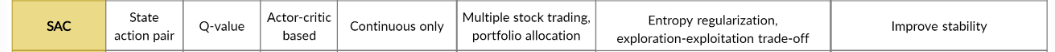

In [42]:
print("==============Model Training===========")
now = datetime.datetime.now().strftime("%Y%m%d-%Hh%M")

model_sac = agent.get_model("sac")
trained_sac = agent.train_model(model=model_sac, tb_log_name="sac", total_timesteps=80000 )

==============Model Training===========
{'batch_size': 64, 'buffer_size': 100000, 'learning_rate': 0.0001, 'learning_starts': 100, 'ent_coef': 'auto_0.1'}
Using cuda device
Logging to tensorboard_log/sac/sac_1
---------------------------------
| time/              |          |
|    episodes        | 4        |
|    fps             | 49       |
|    time_elapsed    | 103      |
|    total timesteps | 5128     |
| train/             |          |
|    actor_loss      | -5.76    |
|    critic_loss     | 0.0319   |
|    ent_coef        | 0.0605   |
|    ent_coef_loss   | -64.8    |
|    learning_rate   | 0.0001   |
|    n_updates       | 5027     |
---------------------------------
---------------------------------
| time/              |          |
|    episodes        | 8        |
|    fps             | 49       |
|    time_elapsed    | 206      |
|    total timesteps | 10256    |
| train/             |          |
|    actor_loss      | -12.9    |
|    critic_loss     | 0.0412   |
|    ent

#Save Model

In [59]:
!mkdir -p saved_model
trained_sac.save('saved_model/my_modelBIST.h5') 

In [43]:
trained_sac

In [44]:
print("==============Start Trading===========")
e_trade_gym = StockTradingEnv(df=trade, turbulence_threshold=250, **env_kwargs)

df_account_value, df_actions = DRLAgent.DRL_prediction( model=trained_sac, environment = e_trade_gym)


==============Start Trading===========
hit end!


In [45]:
df_account_value

profit_list = []
ac_val = list(df_account_value["account_value"])
print(ac_val)
turn =len(ac_val)
for i in range(turn):
  
  if i != turn-1:

    diff = ac_val[i+1]  - ac_val[i]
    profit_list.append(diff)
  else:
    profit_list.append(float(0))
    
print(profit_list)


[100.0, 97.87413122177125, 98.76161289787294, 99.57161236381532, 97.23161411857606, 94.63160801506044, 86.55161190605165, 91.23160935020448, 92.9816103038788, 95.37161160087587, 96.65161228752137, 94.08906226158143, 93.71018359231951, 93.11321064996721, 96.22124573755266, 100.8099174218178, 100.41938181781771, 103.50741692447664, 105.3046311016083, 112.99811683845522, 107.66570173454286, 112.60455070686342, 110.70703779411318, 106.9387372608185, 106.83909456396107, 106.16909496450428, 104.87909071111683, 105.24909011983875, 107.52128756475453, 107.77699292135243, 106.69223424911503, 108.80507648158078, 108.53472228670125, 109.18978737664227, 112.59127711129193, 117.29339479279523, 114.90899013352399, 117.02657412362103, 116.55979536843304, 115.47595475983624, 115.55101989579205, 117.43518232178693, 117.16376824784284, 114.70246739792829, 114.06615669631964, 116.19232846641546, 116.62173888540275, 116.90174147939689, 117.56174323415763, 116.76174304342277, 115.70174262380607, 115.601737

In [46]:
new_df = df_account_value.copy()

new_df["diff"] = np.array(profit_list)

new_df

,date,account_value,diff
0,2020-07-27,100.000000,-2.125869
1,2020-07-28,97.874131,0.887482
2,2020-07-29,98.761613,0.809999
3,2020-07-30,99.571612,-2.339998
4,2020-08-04,97.231614,-2.600006
...,...,...,...
244,2021-07-14,188.333145,-3.960003
245,2021-07-16,184.373143,-2.639999
246,2021-07-19,181.733143,-1.239994
247,2021-07-26,180.493149,0.113281


In [47]:
%matplotlib inline

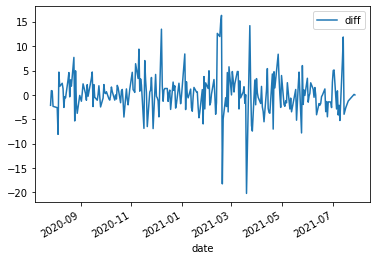

In [48]:
# hesaptaki günlük kar-zarar grafiği
new_df.plot(x='date', y='diff', kind = 'line')

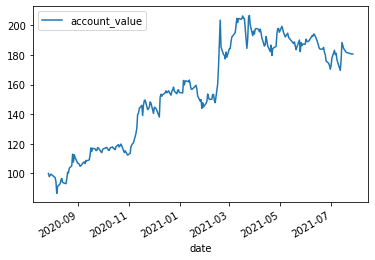

In [49]:
# total hesaptaki maliyetin değişimi
new_df.plot(x='date', y='account_value', kind = 'line')

In [50]:
df_actions

,AKBNK.IS,ARCLK.IS,BIMAS.IS,EREGL.IS,GARAN.IS,HALKB.IS,PETKM.IS,PGSUS.IS,SAHOL.IS,SASA.IS,THYAO.IS,TUPRS.IS,VAKBN.IS,VESTL.IS
date,,,,,,,,,,,,,,
2020-07-27,0,2,0,0,0,0,0,1,0,0,0,0,0,0
2020-07-28,0,0,0,0,0,0,0,-1,0,0,0,0,0,3
2020-07-29,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-07-30,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-08-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2021-07-14,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2021-07-16,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
ticker_df = df_actions["VESTL.IS"]
ticker_df.sum()


0

# 1 Day test

In [52]:
print("==============Start Trading===========")
trade_1day = data_split(processed_full, "2021-07-10", "2021-07-17")

e_trade_gym_1day = StockTradingEnv(df=trade_1day, turbulence_threshold=250, **env_kwargs)

df_account_value_1day, df_actions_1day = DRLAgent.DRL_prediction( model=trained_sac, environment = e_trade_gym_1day)


==============Start Trading===========
hit end!


In [53]:
df_account_value_1day

,date,account_value
0,2021-07-12,100.000000
1,2021-07-13,99.001297
2,2021-07-14,99.931300
3,2021-07-16,99.011297


In [61]:
df_actions_1day.columns

Index(['AKBNK.IS', 'ARCLK.IS', 'BIMAS.IS', 'EREGL.IS', 'GARAN.IS', 'HALKB.IS',
       'PETKM.IS', 'PGSUS.IS', 'SAHOL.IS', 'SASA.IS', 'THYAO.IS', 'TUPRS.IS',
       'VAKBN.IS', 'VESTL.IS'],
      dtype='object')

In [ ]:
import os
cwd = os.getcwd()
cwd

'/content'

In [60]:
import os
os.chdir('/content/saved_model')


with open("./" + "/df_account_value_BIST" + now + ".csv", 'a') as f1:
    df_account_value.to_csv(f1, header=False)

with open("./"+ "/df_actions_BIST" + now + ".csv", 'a') as f2:
    df_actions.to_csv(f2, header=False)




#Backtesting 

In [55]:
print("==============Get Backtest Results===========")
perf_stats_all = backtest_stats(df_account_value)
perf_stats_all = pd.DataFrame(perf_stats_all)
perf_stats_all.to_csv("./" +"/perf_stats_all_BIST" + now + ".csv")


==============Get Backtest Results===========
Annual return          0.818974
Cumulative returns     0.806064
Annual volatility      0.420370
Sharpe ratio           1.638499
Calmar ratio           4.562858
Stability              0.826892
Max drawdown          -0.179487
Omega ratio            1.343081
Sortino ratio          2.678456
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.496264
Daily value at risk   -0.050228
dtype: float64


 #Understanding Format of Variables:

In [48]:
train

,open,high,low,close,adj close,volume,tic,date,macd,rsi_30,cci_30,dx_30,turbulence
0,6.182181,6.182181,6.122160,6.165032,5.510608,13466375,AKBNK.IS,2015-07-27,0.000000,0.000000,66.666667,100.000000,0.00000
0,14.750000,14.950000,14.500000,14.600000,11.878804,1976842,ARCLK.IS,2015-07-27,0.000000,0.000000,66.666667,100.000000,0.00000
0,23.525000,23.799999,23.325001,23.600000,19.072001,628882,BIMAS.IS,2015-07-27,0.000000,0.000000,66.666667,100.000000,0.00000
0,3.990000,4.040000,3.960000,4.040000,1.965522,6776403,EREGL.IS,2015-07-27,0.000000,0.000000,66.666667,100.000000,0.00000
0,7.900000,7.910000,7.740000,7.760000,6.942376,63095366,GARAN.IS,2015-07-27,0.000000,0.000000,66.666667,100.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281,10.004468,10.263843,9.930361,10.123040,10.123040,29892348,SASA.IS,2020-07-24,0.633239,68.646562,138.956885,47.425085,2.90643
1281,11.750000,11.860000,11.710000,11.730000,11.730000,41921530,THYAO.IS,2020-07-24,-0.094282,49.175200,-75.939490,2.560501,2.90643
1281,87.400002,87.650002,86.949997,87.250000,87.250000,2182917,TUPRS.IS,2020-07-24,-0.166060,48.918967,-31.794696,8.924711,2.90643
1281,4.890000,4.920000,4.840000,4.880000,4.880000,39839221,VAKBN.IS,2020-07-24,-0.010792,48.479858,-67.830976,7.872245,2.90643


In [49]:
trade

,open,high,low,close,adj close,volume,tic,date,macd,rsi_30,cci_30,dx_30,turbulence
0,5.800000,5.810000,5.70,5.720000,5.578002,43319180,AKBNK.IS,2020-07-27,-0.032535,45.321645,-107.064136,3.281478,7.261721
0,22.240000,22.540001,22.10,22.160000,20.744827,10243494,ARCLK.IS,2020-07-27,1.084334,71.838800,145.124012,62.664200,7.261721
0,74.699997,75.900002,74.25,74.300003,69.351898,2675233,BIMAS.IS,2020-07-27,1.951131,65.861834,192.733720,48.082447,7.261721
0,8.410000,8.510000,8.39,8.470000,7.452500,36658368,EREGL.IS,2020-07-27,0.000343,50.769015,-40.977438,1.932329,7.261721
0,7.950000,7.960000,7.77,7.800000,7.635209,98366875,GARAN.IS,2020-07-27,-0.083367,43.797485,-114.132586,16.189562,7.261721
...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,29.680000,30.299999,29.34,29.540001,29.540001,15605997,SASA.IS,2021-07-27,-0.567082,47.213518,-26.532921,13.879146,8.604229
248,12.310000,12.600000,12.24,12.550000,12.550000,90420698,THYAO.IS,2021-07-27,-0.338376,42.154444,-164.845461,45.507105,8.604229
248,91.849998,92.500000,91.00,92.349998,92.349998,2781736,TUPRS.IS,2021-07-27,-1.613261,42.913015,-125.319653,47.509144,8.604229
248,3.430000,3.440000,3.39,3.420000,3.420000,30871452,VAKBN.IS,2021-07-27,-0.036190,42.210935,-143.798826,35.035782,8.604229


In [50]:
e_train_gym

In [51]:
agent

In [52]:
model_sac

In [53]:
trained_sac

In [54]:
e_trade_gym

In [55]:
df_account_value

,date,account_value
0,2020-07-27,100.000000
1,2020-07-28,98.322331
2,2020-07-29,99.382331
3,2020-07-30,97.714656
4,2020-08-04,97.749488
...,...,...
244,2021-07-14,232.888771
245,2021-07-16,234.148773
246,2021-07-19,238.138765
247,2021-07-26,236.878774


In [56]:
df_actions

,AKBNK.IS,ARCLK.IS,BIMAS.IS,EREGL.IS,GARAN.IS,HALKB.IS,PETKM.IS,PGSUS.IS,SAHOL.IS,SASA.IS,THYAO.IS,TUPRS.IS,VAKBN.IS,VESTL.IS
date,,,,,,,,,,,,,,
2020-07-27,0,0,0,1,0,0,0,0,0,0,0,0,0,5
2020-07-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-07-29,0,0,0,-1,0,0,3,0,0,0,0,0,0,0
2020-07-30,0,3,0,1,0,0,0,0,0,0,1,0,0,-5
2020-08-04,0,0,0,-1,0,0,2,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2021-07-14,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2021-07-16,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
hold_df = df_actions
df_actions = df_actions.iloc[0:100]

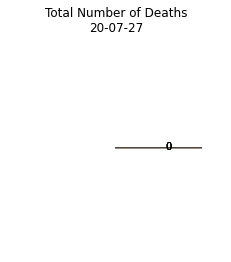

In [158]:

df_actions  = df_actions.iloc[: , :4]
import numpy as np
import matplotlib.pyplot as plt
fig,ax = plt.subplots()


explode=[0.01,0.01,0.01,0.01] #pop out each slice from the pie

def absolute_value(val): #turn % back to a number
    a  = np.round(val/100.*df_actions.head(i).max().sum(), 0)
    return int(a)
    
def getmepie(i):   
    ax.clear()
    plot = df_actions.head(i).max().plot.pie(y=df_actions.columns,autopct=absolute_value, label='',explode = explode, shadow = True)
    plot.set_title('Total Number of Deaths\n' + str(df_actions.index[min( i, len(df_actions.index)-1 )].strftime('%y-%m-%d')), fontsize=12)


import matplotlib.animation as ani
animator = ani.FuncAnimation(fig, getmepie, interval = 200)
plt.show()

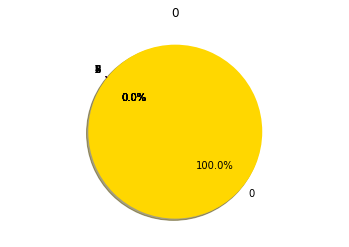

In [57]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'limegreen', 
          'red', 'navy', 'blue', 'magenta', 'crimson']
explode = (0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, .01)
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
nums = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

fig, ax = plt.subplots()

def update(num):
    ax.clear()
    ax.axis('equal')
    str_num = str(num)
    for x in range(10):
        nums[x] += str_num.count(str(x))
    ax.pie(nums, explode=explode, labels=labels, colors=colors, 
            autopct='%1.1f%%', shadow=True, startangle=140)
    ax.set_title(str_num)

ani = FuncAnimation(fig, update, frames=range(100), repeat=False)
plt.show()